# dSPN optimisation - Dopaminergic modulation

In [ ]:
from neuromodulation.modulation_set import defineModulation

### Neuromodulation set up

In [ ]:
cellTypefolder = '../model/str-dspn-e150602_c1_D1-mWT-0728MSN01-v20210212/'

In [ ]:
out_put_dir = 'dspn/str-dspn-e150602_c1_D1-mWT-0728MSN01-v20210212/'

In [ ]:
ModSet = defineModulation()
ModSet.cell_name('dSPN')
ModSet.define_neuromodulation(modulationA = "dopamine")
ModSet.new_modulation_dir(out_put_dir)
ModSet.parameterID = 0
ModSet.tstop = 1000
ModSet.set_time_step(dt=0.025)
ModSet.population = 10
ModSet.cellDir = cellTypefolder

In [ ]:
ModSet.define_modulation_parameter('naf','dopamine','somatic', [0.6,0.8])
ModSet.define_modulation_parameter('naf','dopamine','basal', [0.6,0.8])

ModSet.define_modulation_parameter('kas','dopamine','somatic', [0.65,0.85])
ModSet.define_modulation_parameter('kas','dopamine','basal', [0.65,0.85])

ModSet.define_modulation_parameter('kaf','dopamine','somatic', [0.75,0.85])
ModSet.define_modulation_parameter('kaf','dopamine','basal', [0.75,0.85])

ModSet.define_modulation_parameter('kir','dopamine','somatic', [0.85,1.25])
ModSet.define_modulation_parameter('kir','dopamine','basal', [0.85,1.25])

ModSet.define_modulation_parameter('cal12','dopamine','somatic', [1,2])
ModSet.define_modulation_parameter('cal12','dopamine','basal', [1,2])

ModSet.define_modulation_parameter('cal13','dopamine','somatic', [1,2])
ModSet.define_modulation_parameter('cal13','dopamine','basal', [1,2])

ModSet.define_modulation_parameter('can','dopamine','somatic', [0.2,1])


In [ ]:
ModSet.define_modulation_function(modulation_function = {"function" : "bath_application","gmax" : 1})

In [ ]:
ModSet.define_protocol(typeEx = 'current_clamp', parameters = {"start" : 0,"duration" : 1000 , "amp" : 0.08})

In [ ]:
ModSet.define_protocol(typeEx = 'current_clamp', parameters = {"start" : 200,"duration" : 500 , "amp" : 0.416})

# Literature

Planert et al 2013, Figure 6 C mean increase AP : 6.44 , std 0.89

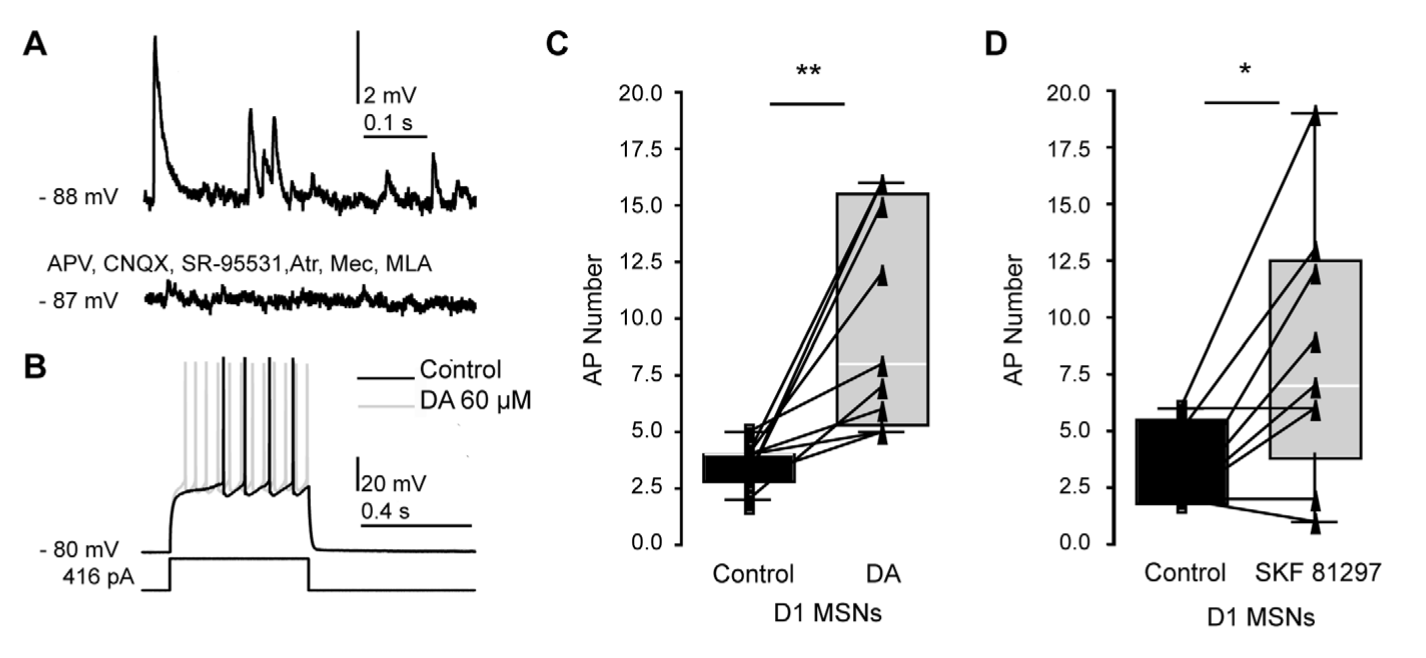

In [ ]:
ModSet.define_selection_criteria(function = "frequency_change_increase", criteria ={ "selection" : {"mean" : 6.44, "std" : 0.89, "threshold":1.5}, "parameters" : { "tstart":200,"tstop": 700}})

In [ ]:
ModSet.save_modulation_setup()
ModSet.save_modulation()
ModSet.neuromodulationDir

## Optimise the modulated models 

In [ ]:
!nrnivmodl mechanisms-dspn/

In [2]:
import time


In [3]:
seconds = time.time()
!mpiexec -n 4 python ../../neuromodulation/optimise.py 'dspn/str-dspn-e150602_c1_D1-mWT-0728MSN01-v20210212/dopamine/' 12345
print("Seconds =", time.time() - seconds)

numprocs=4
Traceback (most recent call last):
  File "../../neuromodulation/optimise.py", line 280, in <module>
    Opt = Optimise_modulation(setup = objectives)
TypeError: __init__() got an unexpected keyword argument 'setup'
Traceback (most recent call last):
  File "../../neuromodulation/optimise.py", line 280, in <module>
    Opt = Optimise_modulation(setup = objectives)
TypeError: __init__() got an unexpected keyword argument 'setup'
Traceback (most recent call last):
  File "../../neuromodulation/optimise.py", line 280, in <module>
    Opt = Optimise_modulation(setup = objectives)
TypeError: __init__() got an unexpected keyword argument 'setup'
Traceback (most recent call last):
  File "../../neuromodulation/optimise.py", line 280, in <module>
    Opt = Optimise_modulation(setup = objectives)
TypeError: __init__() got an unexpected keyword argument 'setup'
-------------------------------------------------------
Primary job  terminated normally, but 1 process returned
a non-zero e